In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import decomposition
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from reproduction import analysis
from reproduction.models import autoencoder
from reproduction.pipeline.load import load_data

/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/clouds/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
model_dir = "../output/mod09cnn15/"

encoder, decoder = autoencoder(shape=(None, None, 7), data_format="channels_last")

encoder.load_weights(model_dir + "encoder.h5")
decoder.load_weights(model_dir + "decoder.h5")

In [3]:
SHAPE = 128, 128, 7
data = analysis.AEData(load_data("../data/tif/*.tfrecord", SHAPE, flips=False), n=3000)

In [4]:
data.raw_encs = encoder.predict(data.imgs)
data.ae_imgs = decoder.predict(data.raw_encs)

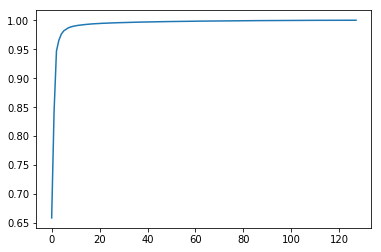

In [27]:
data.encs = data.raw_encs.mean(axis=(1,2))
data.compute_pca()
plt.plot(data._evals.cumsum() / data._evals.sum())

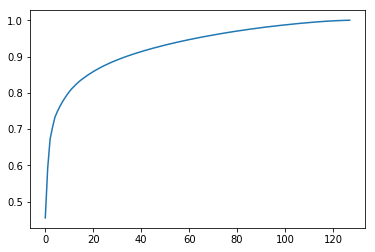

In [28]:
data.encs = data.raw_encs.reshape((-1, 128))
data.compute_pca()
plt.plot(data._evals.cumsum() / data._evals.sum())

In [29]:
goo = data.pca_project(data.raw_encs, d=3).T.reshape(3000, -1)

In [38]:
goo = data.encs

In [39]:
n_components = 30
mbdl = decomposition.MiniBatchDictionaryLearning(n_components, alpha=50)
tr = mbdl.fit_transform(goo)

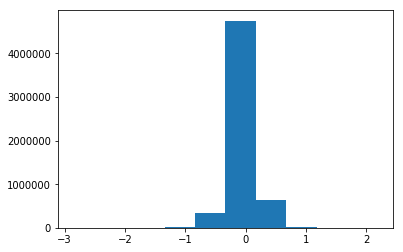

In [41]:
plt.hist(tr.ravel());

In [ ]:
ncols = 10
nrows = n_components
width = 2

# fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * width, nrows * width))

h,w,c = SHAPE

canvas = np.zeros((nrows * h, ncols * w))

def cosine_similarity(code, vecs):
    return code.dot(vecs.T) / np.diag(vecs.dot(vecs.T)) ** .5 / code.dot(code) ** .5

for code in range(nrows):
    
    dists = cosine_similarity(mbdl.components_[code], goo)
    nearests = dists.argsort()
    
    for i in range(ncols):
        canvas[code * h: (code + 1) * h, i * w: (i + 1) * w] = data.imgs[nearests[i], :, :, 0]

In [ ]:
plt.figure(figsize=(ncols * width, nrows * width))
plt.imshow(canvas, cmap="bone")
# plt.savefig("sparse_codes_neighbors2.png")
# plt.close()